## Supplement 4: Classification

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm



### 4.3 Programming Task: Song popularity prediction using Logistic regression
The datasets __train-songs.csv__ and __test-songs.csv__ contain audio properties of various tracks collected from the music streaming site Spotify.


The goal of the task is to train a logistic regression classifier that predicts if
a given track is popular or not.
The dataset consists of 9 columns.
The first 8 columns contain various audio properties
which are provided as input features to the model.
The last column contains the class labels given by 0(not popular) and 1(popular).

i\. Implement the loss function and its gradient for the logistic regression model.
 

In [5]:


def logistic_function(x):    
    return 1/ (1 + np.exp(-x))

def compute_loss(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient
               
data = pd.read_csv("train-songs.csv")
print(data.head())
scores = data[['danceability', 'key', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo' ]].values
results = data['popular'].values

#normalization
scores_min = np.min(scores, axis=0)
scores_max = np.max(scores, axis=0)
scores = (scores - scores_min) / (scores_max - scores_min) 

rows = scores.shape[0]
cols = scores.shape[1]


#include intercept
X = np.append(np.ones((rows, 1)), scores, axis=1) 
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_loss(theta_init, X, y)

#print("Cost at initialization", cost)
#print("Gradient at initialization:", gradient)



   danceability  key  loudness  acousticness  instrumentalness  liveness  \
0         0.391    8    -9.532         0.478          0.000006    0.1160   
1         0.628    1   -13.834         0.156          0.010400    0.0836   
2         0.613    3   -22.789         0.864          0.000000    0.2690   
3         0.504    2    -5.931         0.414          0.000000    0.0845   
4         0.698    9    -3.840         0.101          0.000000    0.1070   

   valence    tempo  popular  
0    0.138  105.593      0.0  
1    0.761  102.974      0.0  
2    0.371   75.104      0.0  
3    0.163  135.927      1.0  
4    0.931  124.042      1.0  


   ii\. Using the gradient descent algorithm, train the logistic regression model.
You may reuse/modify the gradient descent algorithm from the previous supplement.




Theta after running gradient descent: [[-1.09587611e+01]
 [ 1.77637388e+00]
 [ 5.99565739e-03]
 [ 1.36329060e+01]
 [-2.85734534e+00]
 [-6.92316935e-01]
 [-9.93631098e-02]
 [-8.86102761e-01]
 [ 3.33247178e-01]]
Resulting cost: 0.43141328841993093


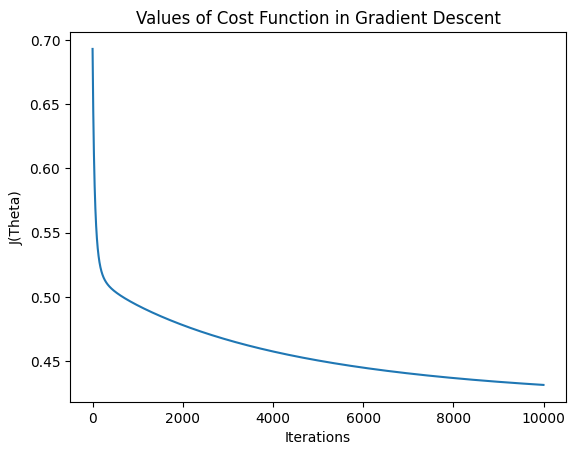

In [6]:
def gradient_descent(x, y, theta, alpha, tol, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_loss(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
        if np.linalg.norm(gradient) < tol:
            break
    return theta, costs

theta, costs = gradient_descent(X, y, theta_init, 0.4,1e-3, 10000)
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("J(Theta)")
plt.title("Values of Cost Function in Gradient Descent");




iii\. Using model predictions on __test-songs.csv__, build the confusion
matrix and subsequently calculate the precision, recall, and F1-score for a threshold of 0.4.


In [7]:

def predict(theta, x):
    pred_prob = []
    results = x.dot(theta)
    pred_prob.append(results)
    return pred_prob , results > 0.4


#get test data 
read_data = pd.read_csv("test-songs.csv")
test_data = read_data[['danceability', 'key', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo' ]].values
test_data_results = read_data['popular'].values


rows = test_data.shape[0]

#normalization
test_data_min = np.min(test_data, axis=0)
test_data_max = np.max(test_data, axis=0)
test_data = (test_data - test_data_min) / (test_data_max - test_data_min)

test_data_results = test_data_results.reshape(rows, 1)
test_data = np.append(np.ones((rows, 1)), test_data, axis=1)

#Prediction
pred_prob , p = predict(theta, test_data)

print("Training Accuracy:", (sum(p==test_data_results)*100/rows),"%")


#build confusion matrix
actual_y = test_data_results.flatten()
predicted_y = p.flatten()


data = {'y_actual': actual_y,
        'y_predicted': predicted_y
        }

df = pd.DataFrame(data)
df["y_predicted"] = df["y_predicted"].astype(int)
confusion_matrix = pd.crosstab(df['y_actual'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])
print('Confusion Matrix')
print(confusion_matrix)
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]


#precision
Precision = TP / (TP + FP) 
print('Precision')
print(Precision)
Recall = TP / (TP + FN)
print('Recall')
print(Recall)

#F1 Score
F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
print('F1_Score')
print(F1_Score)


#Accuracy
Accuracy = (TP + TN)/(TN + FP + FN + TP)
print('Accuracy')
print(Accuracy)









Training Accuracy: [75.4] %
Confusion Matrix
Predicted    0    1
Actual             
0.0        900  100
1.0        392  608
Precision
0.608
Recall
0.8587570621468926
F1_Score
0.7119437939110069
Accuracy
0.754


iv\. Plot the ROC curve for the model and calculate the AUC metric of your model.


100%|█████████████████████████████████████████████████████████████████████████████| 1999/1999 [00:04<00:00, 490.51it/s]

AUC Score 0.8823880000000002


Text(0.5, 1.0, 'AUC=0.8824')

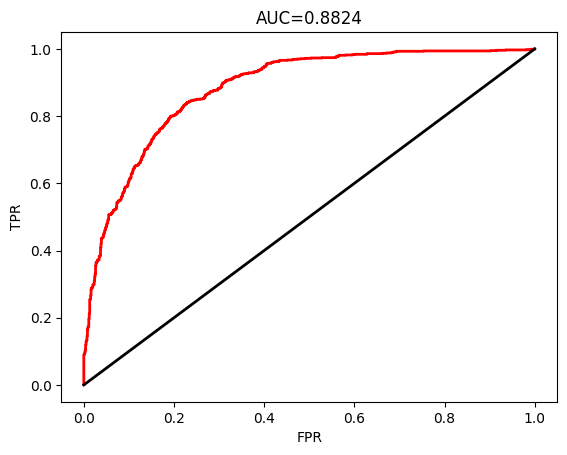

In [8]:

def get_single_tpr_fpr(df):

    tp = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
    fp = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
    tn = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
    fn = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()

    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)
    return [tpr, fpr]

def calculate_all_thresholds_tpr_fpr_arr(df_original):

    tpr_arr_for_all_thresholds = []
    fpr_arr_for_all_thresholds = []

    sorted_df = df_original.sort_values(by=['proba'], ascending=False)

    unique_probability_thresholds = sorted_df['proba'].unique()

    for threshold in tqdm(unique_probability_thresholds):
        sorted_df['y_predicted'] = np.where(sorted_df['proba'] >= threshold, 1, 0)
        tpr_fpr_arr = get_single_tpr_fpr(sorted_df)
        tpr_arr_for_all_thresholds.append(tpr_fpr_arr[0])
        fpr_arr_for_all_thresholds.append(tpr_fpr_arr[1])

    return tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds


pred_prob = np.array(pred_prob)
pred_prob = pred_prob.flatten()
data_1 = {'y': actual_y,
          'proba':pred_prob,
        'y_predicted': predicted_y
        }

df_1 = pd.DataFrame(data_1)
df_1["y_predicted"] = df_1["y_predicted"].astype(int)



all_tpr_together, all_fpr_together = calculate_all_thresholds_tpr_fpr_arr(df_1)
auc_score = np.trapz(all_tpr_together, all_fpr_together)
print('AUC Score', auc_score)


plt.plot(all_fpr_together, all_tpr_together, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score, 4)))

v\. Consider the simpler models given below.The input $\mathbf{x}$ in these models takes only 4 input features from the given dataset.

- Model A $~~~~~~~~~~~$   $\mathbf{x}$ = $[$ danceability, key, valence, tempo $]^\top$
- Model B $~~~~~~~~~~~$  $\mathbf{x}$ = $[$ danceability, loudness, acousticness, instrumentalness $]^\top$
- Model C $~~~~~~~~~~~$ $\mathbf{x}$ = $[$ key, liveness, valence, tempo $]^\top$

Train these models using your logistic regression implementation and determine the best performing model using the AUC metric.

100%|█████████████████████████████████████████████████████████████████████████████| 1998/1998 [00:03<00:00, 539.81it/s]

AUC Score 0.659648


Text(0.5, 1.0, 'AUC=0.6596')

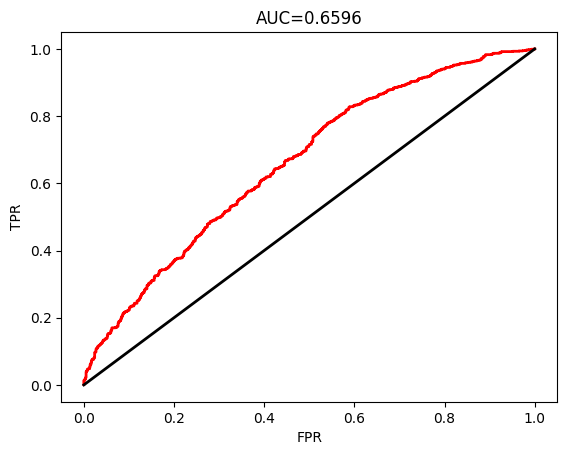

In [9]:
########################################### Model A ######################################################################
data = pd.read_csv("train-songs.csv")
scores = data[['danceability', 'key','valence', 'tempo' ]].values
results = data['popular'].values

#normalization
scores_min = np.min(scores, axis=0)
scores_max = np.max(scores, axis=0)
scores = (scores - scores_min) / (scores_max - scores_min) 

rows = scores.shape[0]
cols = scores.shape[1]

#include intercept
X = np.append(np.ones((rows, 1)), scores, axis=1) 
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_loss(theta_init, X, y)
theta, costs = gradient_descent(X, y, theta_init, 0.4,1e-3, 10000)

#get test data 
read_data = pd.read_csv("test-songs.csv")
test_data = read_data[['danceability', 'key', 'valence', 'tempo' ]].values
test_data_results = read_data['popular'].values


rows = test_data.shape[0]

#normalization
test_data_min = np.min(test_data, axis=0)
test_data_max = np.max(test_data, axis=0)
test_data = (test_data - test_data_min) / (test_data_max - test_data_min)

test_data_results = test_data_results.reshape(rows, 1)
test_data = np.append(np.ones((rows, 1)), test_data, axis=1)

#Prediction
pred_prob_a , p = predict(theta, test_data)

pred_prob_a = np.array(pred_prob_a)
pred_prob_a = pred_prob_a.flatten()
actual_y = test_data_results.flatten()
predicted_y = p.flatten()
data_1 = {'y': actual_y,
          'proba':pred_prob_a,
        'y_predicted': predicted_y
        }

df_1 = pd.DataFrame(data_1)
df_1["y_predicted"] = df_1["y_predicted"].astype(int)



all_tpr_together, all_fpr_together = calculate_all_thresholds_tpr_fpr_arr(df_1)
auc_score = np.trapz(all_tpr_together, all_fpr_together)
print('AUC Score', auc_score)


plt.plot(all_fpr_together, all_tpr_together, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score, 4)))


100%|█████████████████████████████████████████████████████████████████████████████| 1999/1999 [00:03<00:00, 572.48it/s]

AUC Score 0.8788000000000001


Text(0.5, 1.0, 'AUC=0.8788')

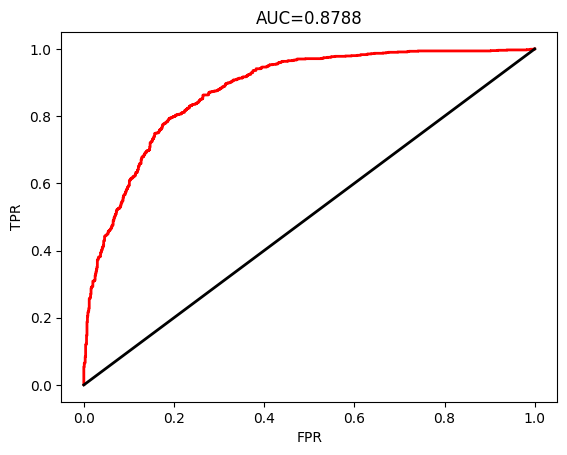

In [10]:
########################################### Model B ######################################################################
data = pd.read_csv("train-songs.csv")
scores = data[['danceability', 'loudness', 'acousticness', 'instrumentalness']].values
results = data['popular'].values

#normalization
scores_min = np.min(scores, axis=0)
scores_max = np.max(scores, axis=0)
scores = (scores - scores_min) / (scores_max - scores_min) 

rows = scores.shape[0]
cols = scores.shape[1]

#include intercept
X = np.append(np.ones((rows, 1)), scores, axis=1) 
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_loss(theta_init, X, y)
theta, costs = gradient_descent(X, y, theta_init, 0.4,1e-3, 10000)

#get test data 
read_data = pd.read_csv("test-songs.csv")
test_data = read_data[['danceability', 'loudness', 'acousticness', 'instrumentalness']].values
test_data_results = read_data['popular'].values


rows = test_data.shape[0]

#normalization
test_data_min = np.min(test_data, axis=0)
test_data_max = np.max(test_data, axis=0)
test_data = (test_data - test_data_min) / (test_data_max - test_data_min)

test_data_results = test_data_results.reshape(rows, 1)
test_data = np.append(np.ones((rows, 1)), test_data, axis=1)

#Prediction
pred_prob , p = predict(theta, test_data)

pred_prob = np.array(pred_prob)
pred_prob = pred_prob.flatten()
actual_y = test_data_results.flatten()
predicted_y = p.flatten()
data_1 = {'y': actual_y,
          'proba':pred_prob,
        'y_predicted': predicted_y
        }

df_1 = pd.DataFrame(data_1)
df_1["y_predicted"] = df_1["y_predicted"].astype(int)



all_tpr_together, all_fpr_together = calculate_all_thresholds_tpr_fpr_arr(df_1)
auc_score = np.trapz(all_tpr_together, all_fpr_together)
print('AUC Score', auc_score)


plt.plot(all_fpr_together, all_tpr_together, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score, 4)))


100%|█████████████████████████████████████████████████████████████████████████████| 1999/1999 [00:03<00:00, 548.02it/s]

AUC Score 0.560526


Text(0.5, 1.0, 'AUC=0.5605')

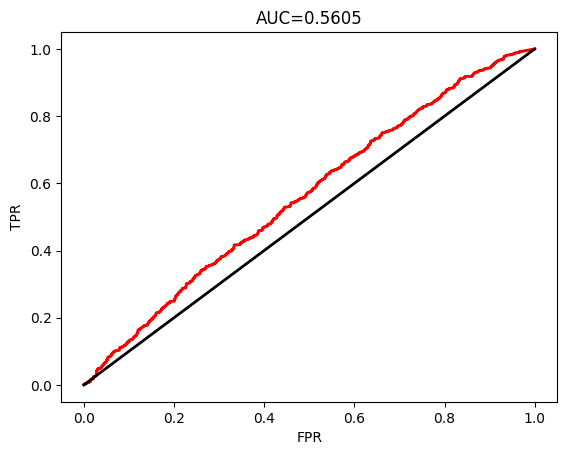

In [12]:
########################################### Model C ######################################################################
data = pd.read_csv("train-songs.csv")
scores = data[['key','liveness', 'valence', 'tempo']].values
results = data['popular'].values

#normalization
scores_min = np.min(scores, axis=0)
scores_max = np.max(scores, axis=0)
scores = (scores - scores_min) / (scores_max - scores_min) 

rows = scores.shape[0]
cols = scores.shape[1]

#include intercept
X = np.append(np.ones((rows, 1)), scores, axis=1) 
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_loss(theta_init, X, y)
theta, costs = gradient_descent(X, y, theta_init, 0.4,1e-3, 10000)

#get test data 
read_data = pd.read_csv("test-songs.csv")
test_data = read_data[['key','liveness', 'valence', 'tempo']].values
test_data_results = read_data['popular'].values


rows = test_data.shape[0]

#normalization
test_data_min = np.min(test_data, axis=0)
test_data_max = np.max(test_data, axis=0)
test_data = (test_data - test_data_min) / (test_data_max - test_data_min)

test_data_results = test_data_results.reshape(rows, 1)
test_data = np.append(np.ones((rows, 1)), test_data, axis=1)

#Prediction
pred_prob , p = predict(theta, test_data)

pred_prob = np.array(pred_prob)
pred_prob = pred_prob.flatten()
actual_y = test_data_results.flatten()
predicted_y = p.flatten()
data_1 = {'y': actual_y,
          'proba':pred_prob,
        'y_predicted': predicted_y
        }

df_1 = pd.DataFrame(data_1)
df_1["y_predicted"] = df_1["y_predicted"].astype(int)



all_tpr_together, all_fpr_together = calculate_all_thresholds_tpr_fpr_arr(df_1)
auc_score = np.trapz(all_tpr_together, all_fpr_together)
print('AUC Score', auc_score)


plt.plot(all_fpr_together, all_tpr_together, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score, 4)))


In [13]:
print('Best performing model based on the AUC metric is Model B')

Best performing model based on the AUC metric is Model B
